In [71]:
# 1. Подготовить данные для обучения модели.

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Генерация тестовых данных
np.random.seed(42)
N = 500  # увеличим количество примеров для лучшего обучения

# Входные данные: 12 бинарных признаков (ответы избирателей)
X = np.random.randint(0, 2, size=(N, 12))  # 1000 примеров, 12 признаков

# Выходные данные: one-hot encoding [1 0] - победа правящей партии, [0 1] - победа оппозиции.
# Создадим более реалистичные данные: сделаем зависимость выбора от комбинации ответов
def generate_labels(x):
    # Простая логика: если сумма ответов на первые 6 вопросов > сумма на последних 6, то победа правящей партии
    if np.sum(x[:6]) > np.sum(x[6:]):
        return np.array([1, 0])  # правящая партия
    else:
        return np.array([0, 1])  # оппозиция

Y = np.array([generate_labels(x) for x in X])
y_labels = np.argmax(Y, axis=1)  # Преобразуем one-hot в метки классов (0 и 1)

# Сохранение данных в файлы
np.savetxt('dataIn.txt', X, fmt='%d')
np.savetxt('dataOut.txt', Y, fmt='%d')

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(X, Y, y_labels, test_size=0.3, random_state=42)

# Нормализация данных (хотя данные бинарные, нормализуем для лучшей сходимости)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Пример входных данных: {X_train[0]}")
print(f"Пример выходных данных: {y_train[0]}")

Размер тренировочной выборки: (350, 12)
Размер тестовой выборки: (150, 12)
Пример входных данных: [0 0 0 0 0 1 1 0 1 1 1 1]
Пример выходных данных: [0 1]


In [73]:
# 2. Создать нейросеть с одним скрытым слоем и функцией активации 'logsig'.

model = keras.Sequential([
    # Скрытый слой с 8 нейронами и функцией активации logsig (сигмоида)
    keras.layers.Dense(8, activation='sigmoid', input_shape=(12,), name='hidden_layer'),

    # Выходной слой с 2 нейронами (для двух классов) и функцией активации softmax
    keras.layers.Dense(2, activation='softmax', name='output_layer')
])

# Компиляция модели
model.compile(
    optimizer='adam',  # адаптивный моментный градиентный спуск
    loss='categorical_crossentropy',  # категориальная кросс-энтропия для многоклассовой классификации
    metrics=['accuracy']
)

# Вывод архитектуры модели
print("\nАрхитектура модели:")
model.summary()


Архитектура модели:


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122 (488.00 B)

 Trainable params: 122 (488.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
# 3. Обучить модель на предоставленных данных.

# Обучение модели
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,  # количество эпох
    batch_size=32,  # размер мини-пакета
    validation_split=0.2,  # 20% тренировочных данных для валидации
    verbose=1  # вывод прогресса обучения
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5893 - loss: 0.6939 - val_accuracy: 0.6000 - val_loss: 0.7026
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5893 - loss: 0.6791 - val_accuracy: 0.6000 - val_loss: 0.6874
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.6642 - val_accuracy: 0.6000 - val_loss: 0.6748
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6143 - loss: 0.6526 - val_accuracy: 0.6000 - val_loss: 0.6634
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6179 - loss: 0.6408 - val_accuracy: 0.6000 - val_loss: 0.6538
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6286 - loss: 0.6310 - val_accuracy: 0.6000 - val_loss: 0.6448
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6429 - loss: 0.6214 - val_accuracy: 0.6429 - val_loss: 0.6362
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6464 - loss: 0.6127 - val_accuracy: 0.6571 - val_loss: 0.6279
Epoch 

In [75]:
# 4. Проверить её точность на тестовых примерах.

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nНейронная сеть - Точность на тестовых данных: {test_accuracy:.4f}")

# Прогнозирование на тестовых данных
y_pred_proba = model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Точность с использованием accuracy_score
accuracy = accuracy_score(y_true, y_pred_nn)
print(f"Accuracy_score на тестовых данных: {accuracy:.4f}")

# Логистическая регрессия
log_reg = LogisticRegression(random_state=42, max_iter=N)
log_reg.fit(X_train_scaled, y_train_labels)
y_pred_lr = log_reg.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test_labels, y_pred_lr)
print(f"Точность логистической регрессии: {lr_accuracy:.4f}")

# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_labels)
y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test_labels, y_pred_rf)
print(f"Точность случайного леса: {rf_accuracy:.4f}")


Нейронная сеть - Точность на тестовых данных: 0.9800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy_score на тестовых данных: 0.9800
Точность логистической регрессии: 1.0000
Точность случайного леса: 0.8467


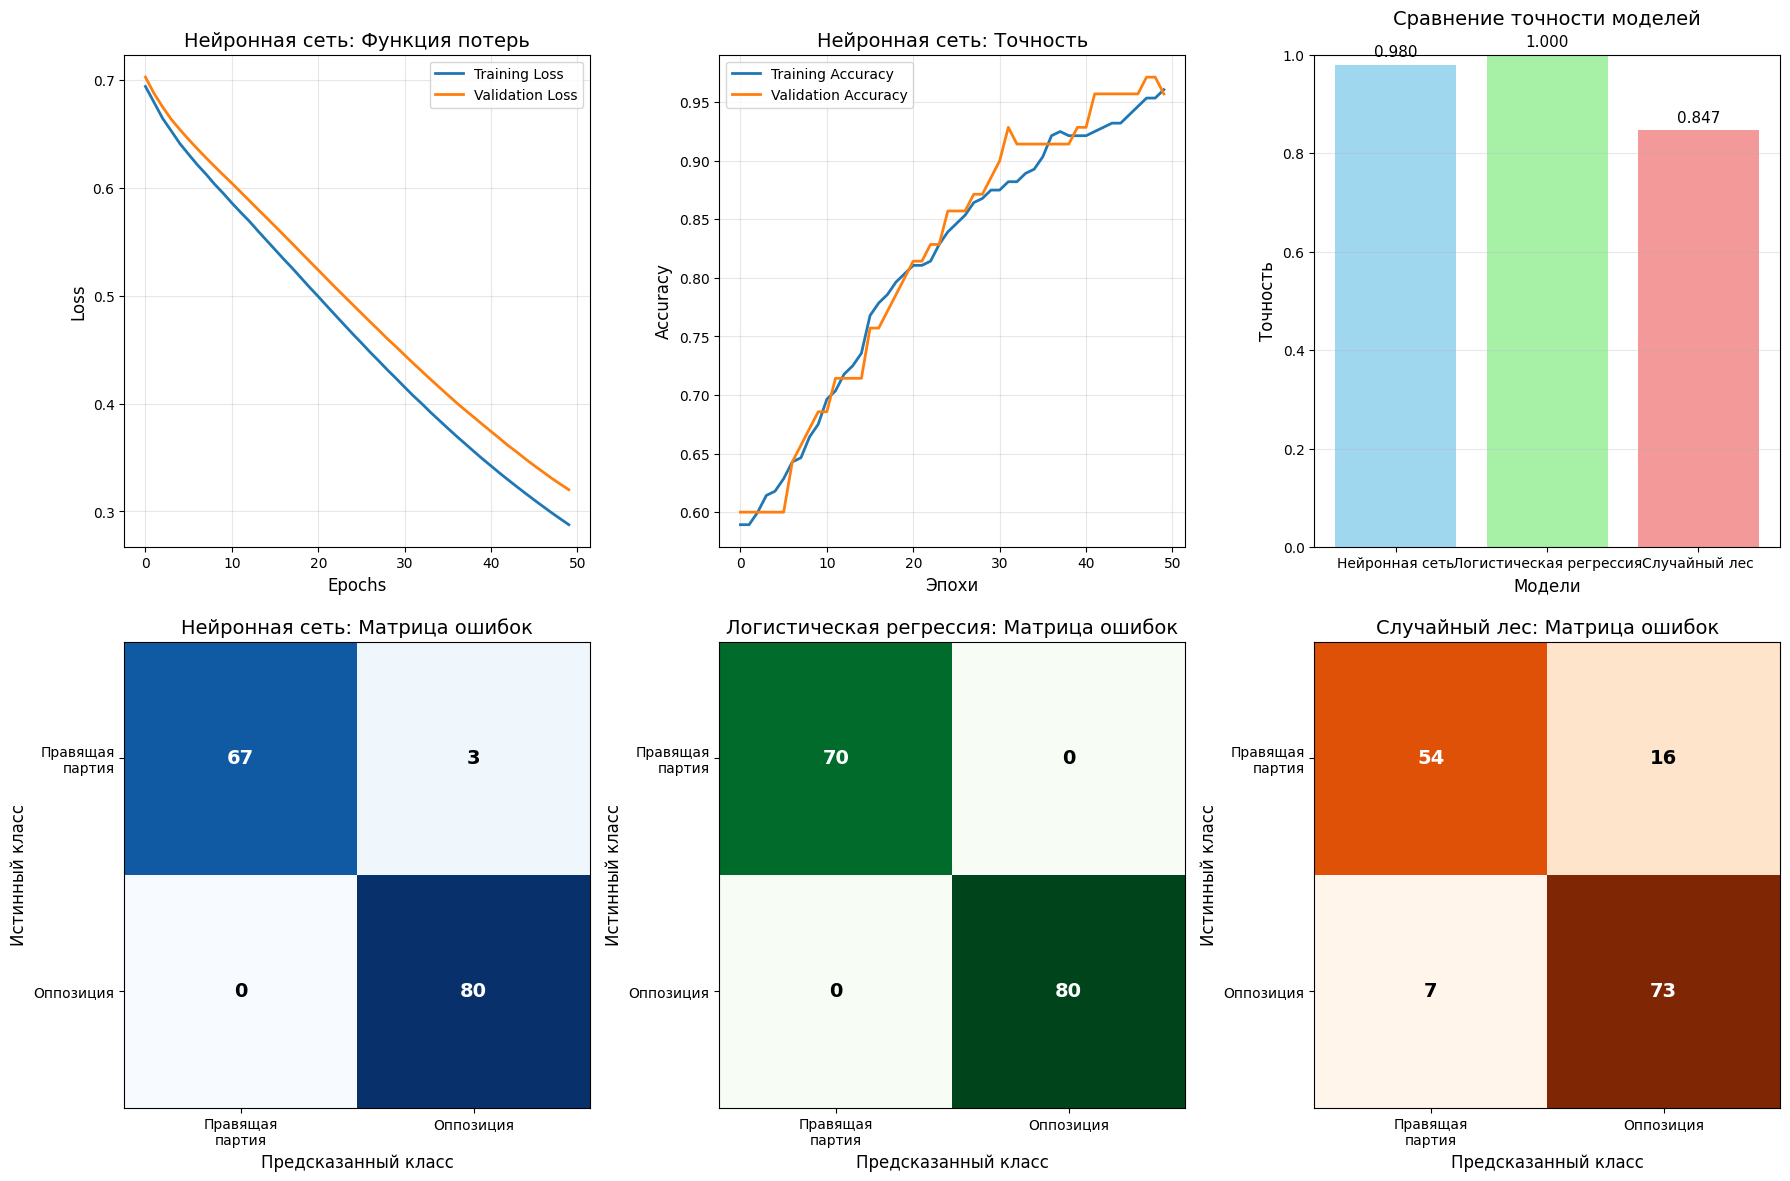

In [76]:
# 5. Визуализировать результаты предсказаний.

models_comparison = {
    'Нейронная сеть': test_accuracy,
    'Логистическая регрессия': lr_accuracy,
    'Случайный лес': rf_accuracy
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# График функции потерь (Loss) нейронной сети
axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Epochs', fontsize=12)
axes[0, 0].set_ylabel('Loss', fontsize=12)
axes[0, 0].set_title('Нейронная сеть: Функция потерь', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. График точности (Accuracy) нейронной сети
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 1].set_xlabel('Эпохи', fontsize=12)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].set_title('Нейронная сеть: Точность', fontsize=14)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Сравнение точности моделей
models = list(models_comparison.keys())
accuracies = list(models_comparison.values())
colors = ['skyblue', 'lightgreen', 'lightcoral']
bars = axes[0, 2].bar(models, accuracies, color=colors, alpha=0.8)
axes[0, 2].set_xlabel('Модели', fontsize=12)
axes[0, 2].set_ylabel('Точность', fontsize=12)
axes[0, 2].set_title('Сравнение точности моделей\n', fontsize=14)
axes[0, 2].set_ylim([0, 1.0])
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{accuracy:.3f}', ha='center', va='bottom', fontsize=11)

# 4. Матрица ошибок нейронной сети (без seaborn)
conf_matrix_nn = confusion_matrix(y_test_labels, y_pred_nn)
im_nn = axes[1, 0].imshow(conf_matrix_nn, cmap='Blues', interpolation='nearest')
axes[1, 0].set_xlabel('Предсказанный класс', fontsize=12)
axes[1, 0].set_ylabel('Истинный класс', fontsize=12)
axes[1, 0].set_title('Нейронная сеть: Матрица ошибок', fontsize=14)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_yticks([0, 1])
axes[1, 0].set_xticklabels(['Правящая\nпартия', 'Оппозиция'])
axes[1, 0].set_yticklabels(['Правящая\nпартия', 'Оппозиция'])

# Добавляем текст в ячейки матрицы
for i in range(conf_matrix_nn.shape[0]):
    for j in range(conf_matrix_nn.shape[1]):
        axes[1, 0].text(j, i, str(conf_matrix_nn[i, j]),
                       ha='center', va='center',
                       color='white' if conf_matrix_nn[i, j] > conf_matrix_nn.max()/2 else 'black',
                       fontsize=14, fontweight='bold')

# 5. Матрица ошибок логистической регрессии (без seaborn)
conf_matrix_lr = confusion_matrix(y_test_labels, y_pred_lr)
im_lr = axes[1, 1].imshow(conf_matrix_lr, cmap='Greens', interpolation='nearest')
axes[1, 1].set_xlabel('Предсказанный класс', fontsize=12)
axes[1, 1].set_ylabel('Истинный класс', fontsize=12)
axes[1, 1].set_title('Логистическая регрессия: Матрица ошибок', fontsize=14)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_yticks([0, 1])
axes[1, 1].set_xticklabels(['Правящая\nпартия', 'Оппозиция'])
axes[1, 1].set_yticklabels(['Правящая\nпартия', 'Оппозиция'])

# Добавляем текст в ячейки матрицы
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        axes[1, 1].text(j, i, str(conf_matrix_lr[i, j]),
                       ha='center', va='center',
                       color='white' if conf_matrix_lr[i, j] > conf_matrix_lr.max()/2 else 'black',
                       fontsize=14, fontweight='bold')

# 6. Матрица ошибок случайного леса (без seaborn)
conf_matrix_rf = confusion_matrix(y_test_labels, y_pred_rf)
im_rf = axes[1, 2].imshow(conf_matrix_rf, cmap='Oranges', interpolation='nearest')
axes[1, 2].set_xlabel('Предсказанный класс', fontsize=12)
axes[1, 2].set_ylabel('Истинный класс', fontsize=12)
axes[1, 2].set_title('Случайный лес: Матрица ошибок', fontsize=14)
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_yticks([0, 1])
axes[1, 2].set_xticklabels(['Правящая\nпартия', 'Оппозиция'])
axes[1, 2].set_yticklabels(['Правящая\nпартия', 'Оппозиция'])

# Добавляем текст в ячейки матрицы
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        axes[1, 2].text(j, i, str(conf_matrix_rf[i, j]),
                       ha='center', va='center',
                       color='white' if conf_matrix_rf[i, j] > conf_matrix_rf.max()/2 else 'black',
                       fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()